## **Proyek Machine Learning - Lulu Nadhiatun Anisa** ##

---

![Image Apel](https://cdn.antaranews.com/cache/1200x800/2022/02/04/Screenshot_2022-02-04-06-04-11-69_copy_1024x683.jpg)

## **Project Overview**

### **Latar Belakang Rekomendasi Film dengan Machine Lerning**


Di era digital, akses informasi yang melimpah melalui internet telah mengubah cara masyarakat memenuhi kebutuhan hiburan, termasuk dalam menonton film. Setiap harinya, jumlah data yang tersedia terus bertambah, memberikan peluang bagi perusahaan untuk memahami preferensi pelanggan secara lebih mendalam. Salah satu solusi yang berkembang dari pemanfaatan data ini adalah sistem rekomendasi, yang dirancang untuk memberikan saran yang relevan dan personal kepada pengguna berdasarkan pola perilaku mereka.  Proyek ini bertujuan untuk mengembangkan model machine learning yang dapat membuat Sistem rekomendasi film. Sistem rekomendasi film merupakan sistem yang merekomendasikan film kepada penonton atau pengguna lainnya. Sistem rekomendasi ini dibuat dengan peferensi kesukaan pengguna dimasa lalu, serta rating dari movie tersebut. Pengembangan model machine learning yang efektif untuk sistem rekomendasi Film dapat menjadi solusi yang inovatif untuk menghadapi tantangan informasi berlimpah dan memberikan pengalaman menyenangkan pengguna.

# **Rekomendasi Sistem: Film**

In [ ]:
from google.colab import drive
drive.mount('/content/gdrive')

Mounted at /content/gdrive


In [ ]:
%cd '/content/gdrive/MyDrive/Active/ML-TERAPAN/submission2'

/content/gdrive/MyDrive/Active/ML-TERAPAN/submission2


## 1. Import Library

Import library berarti mengambil atau menggunakan fungsi, kelas, atau modul tertentu yang telah didefinisikan sebelumnya dalam pustaka (library).

In [ ]:
import pandas as pd
import numpy as np
import tensorflow as tf
from tensorflow import keras
from tensorflow.keras import layers
from pathlib import Path
import matplotlib.pyplot as plt
from sklearn.feature_extraction.text import TfidfVectorizer
from sklearn.metrics.pairwise import cosine_similarity


## 2. Data Understanding

Data Understanding merupakan proses memahami informasi dalam data dan menentukan kualitas dari data tersebut.

<br>

**Informasi Datasets**


| Jenis | Keterangan |
| ------ | ------ |
| Title | Movie Recommendation Data |
| Source | [Kaggle](https://www.kaggle.com/datasets/rohan4050/movie-recommendation-data) |
| Maintainer | [Rohan Sharma  ⚡](https://www.kaggle.com/rohan4050) |
| License | Other (specified in description) |
| Visibility | Publik |
| Tags | Movie and TV Show, Recommender System |
| Usability | 10.00 |

Membaca dataset yang akan digunakan dengan menggunakan fungsi pandas yaitu pd.read_csv

In [ ]:
movies = pd.read_csv('/content/gdrive/MyDrive/Active/ML-TERAPAN/submission2/small-data/movies.csv') #data film
ratings = pd.read_csv('/content/gdrive/MyDrive/Active/ML-TERAPAN/submission2/small-data/ratings.csv') #data ratings film
tags = pd.read_csv('/content/gdrive/MyDrive/Active/ML-TERAPAN/submission2/small-data/tags.csv') # data tag film
links = pd.read_csv('/content/gdrive/MyDrive/Active/ML-TERAPAN/submission2/small-data/links.csv') #data links setiap film


Melihat jumlah unique dari masing-masing data

In [ ]:
# check and count unique values in each dataframes
print('Jumlah data film: ', len(movies.movieId.unique()))
print('Jumlah data ratings dari user: ', len(ratings.userId.unique()))
print('Jumlah data ratings dari film : ', len(ratings.movieId.unique()))
print('Jumlah data tags film: ', len(tags.userId.unique()))
print('Jumlah data links film: ', len(links.movieId.unique()))
print('Jumlah data : ', len(tags.movieId.unique()))

Jumlah data film:  9742
Jumlah data ratings dari user:  610
Jumlah data ratings dari film :  9724
Jumlah data tags film:  58
Jumlah data links film:  9742
Jumlah data :  1572


Variabel yang ada pada dataset movie-recommendation-data adalah sebagai berikut :

- movies : merupakan daftar movie yang tersedia.
- ratings : merupakan daftar penilaian yang diberikan pengguna terhadap movie.
- tags : merupakan daftar kata kunci dari movie tersebut
- links : merupakan daftar link movie tersebut.

### Movies
Eksplorasi variabel movies yang merupakan daftar movie yang tersedia.

#### Menampilkan dataset

In [ ]:
movies

,movieId,title,genres
0,1,Toy Story (1995),Adventure|Animation|Children|Comedy|Fantasy
1,2,Jumanji (1995),Adventure|Children|Fantasy
2,3,Grumpier Old Men (1995),Comedy|Romance
3,4,Waiting to Exhale (1995),Comedy|Drama|Romance
4,5,Father of the Bride Part II (1995),Comedy
...,...,...,...
9737,193581,Black Butler: Book of the Atlantic (2017),Action|Animation|Comedy|Fantasy
9738,193583,No Game No Life: Zero (2017),Animation|Comedy|Fantasy
9739,193585,Flint (2017),Drama
9740,193587,Bungo Stray Dogs: Dead Apple (2018),Action|Animation


Pada file `movies.csv` berisi daftar film yang memiliki 3 feature:

- `movieId` : memuat nomor ID film  
- `title` : memuat judul film
- `genres` : memuat genre film

#### Informasi dataset

In [ ]:
movies.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 9742 entries, 0 to 9741
Data columns (total 3 columns):
 #   Column   Non-Null Count  Dtype 
---  ------   --------------  ----- 
 0   movieId  9742 non-null   int64 
 1   title    9742 non-null   object
 2   genres   9742 non-null   object
dtypes: int64(1), object(2)
memory usage: 228.5+ KB


Fungsi `.info()` digunakan untuk memberikan deskripsi umum tentang DataFrame, termasuk tipe data, jumlah kolom, jumlah baris, apakah ada nilai kosong (missing values), dan penggunaan memori.

#### Melihat jumlah baris dan kolom

In [ ]:
movies.shape

(9742, 3)

Dari dataset movies diatas yang digunakan berjumlah 9742 baris dengan 3 kolom didalamnya.

#### Deskripsi Dataset

In [ ]:
movies.describe()

,movieId
count,9742.000000
mean,42200.353623
std,52160.494854
min,1.000000
25%,3248.250000
50%,7300.000000
75%,76232.000000
max,193609.000000


Fungsi `describe()` memberikan informasi statistik pada masing-masing kolom, antara lain:

- `Count` adalah jumlah sampel pada data.
- `Mean` adalah nilai rata-rata.
- `Std` adalah standar deviasi.
- `Min` yaitu nilai minimum setiap kolom.
- `25%` adalah kuartil pertama. Kuartil adalah nilai yang menandai batas interval dalam empat bagian sebaran yang sama.
- `50%` adalah kuartil kedua, atau biasa juga disebut median (nilai tengah).
-` 75%` adalah kuartil ketiga.
- `Max` adalah nilai maksimum.

### Ratings
Eksplorasi data yang akan digunakan pada model yaitu data ratings.

#### Menampilkan dataset

In [ ]:
ratings

,userId,movieId,rating,timestamp
0,1,1,4.0,964982703
1,1,3,4.0,964981247
2,1,6,4.0,964982224
3,1,47,5.0,964983815
4,1,50,5.0,964982931
...,...,...,...,...
100831,610,166534,4.0,1493848402
100832,610,168248,5.0,1493850091
100833,610,168250,5.0,1494273047
100834,610,168252,5.0,1493846352


Pada file `ratings.csv` berisi daftar ratings atau penilaian terhadap satu film yang memiliki 4 feature:

- `userId` : memuat nomor ID users
- `movieId` : memuat nomor ID film  
- `rating` : memuat rating atau penilaian films dalam skala bintang, dengan peningkatan setengah bintang dalam rentang 0,5 - 5 bintang
- `timestamp` : memuat kode timestamp

#### Informasi dataset

In [ ]:
ratings.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 100836 entries, 0 to 100835
Data columns (total 4 columns):
 #   Column     Non-Null Count   Dtype  
---  ------     --------------   -----  
 0   userId     100836 non-null  int64  
 1   movieId    100836 non-null  int64  
 2   rating     100836 non-null  float64
 3   timestamp  100836 non-null  int64  
dtypes: float64(1), int64(3)
memory usage: 3.1 MB


Fungsi `.info()` digunakan untuk memberikan deskripsi umum tentang DataFrame, termasuk tipe data, jumlah kolom, jumlah baris, apakah ada nilai kosong (missing values), dan penggunaan memori.

#### Menampilkan jumlah baris dan kolom

In [ ]:
ratings.shape

(100836, 4)


Dari dataset ratings di atas yang digunakan berjumlah 100836 baris dengan 3 kolom didalamnya.

#### Deskripsi Dataset

In [ ]:
ratings.describe()

,userId,movieId,rating,timestamp
count,100836.000000,100836.000000,100836.000000,1.008360e+05
mean,326.127564,19435.295718,3.501557,1.205946e+09
std,182.618491,35530.987199,1.042529,2.162610e+08
min,1.000000,1.000000,0.500000,8.281246e+08
25%,177.000000,1199.000000,3.000000,1.019124e+09
50%,325.000000,2991.000000,3.500000,1.186087e+09
75%,477.000000,8122.000000,4.000000,1.435994e+09
max,610.000000,193609.000000,5.000000,1.537799e+09


Fungsi `describe()` memberikan informasi statistik pada masing-masing kolom, antara lain:

- `Count` adalah jumlah sampel pada data.
- `Mean` adalah nilai rata-rata.
- `Std` adalah standar deviasi.
- `Min` yaitu nilai minimum setiap kolom.
- `25%` adalah kuartil pertama. Kuartil adalah nilai yang menandai batas interval dalam empat bagian sebaran yang sama.
- `50%` adalah kuartil kedua, atau biasa juga disebut median (nilai tengah).
-` 75%` adalah kuartil ketiga.
- `Max` adalah nilai maksimum.

### Tags
Eksplorasi variabel Tags, merupakan tags masing-masing movie tersebut.

#### Menampilkan dataset

In [ ]:
tags

,userId,movieId,tag,timestamp
0,2,60756,funny,1445714994
1,2,60756,Highly quotable,1445714996
2,2,60756,will ferrell,1445714992
3,2,89774,Boxing story,1445715207
4,2,89774,MMA,1445715200
...,...,...,...,...
3678,606,7382,for katie,1171234019
3679,606,7936,austere,1173392334
3680,610,3265,gun fu,1493843984
3681,610,3265,heroic bloodshed,1493843978


Pada file `tags.csv` berisi daftar tags pada film yang diberikan users yang memiliki 4 feature:

- `userId` : memuat nomor ID users
- `movieId` : memuat nomor ID film  
- `tag` : memuat tag film
- `timestamp` : memuat kode timestamp

#### Informasi dataset

In [ ]:
tags.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 3683 entries, 0 to 3682
Data columns (total 4 columns):
 #   Column     Non-Null Count  Dtype 
---  ------     --------------  ----- 
 0   userId     3683 non-null   int64 
 1   movieId    3683 non-null   int64 
 2   tag        3683 non-null   object
 3   timestamp  3683 non-null   int64 
dtypes: int64(3), object(1)
memory usage: 115.2+ KB


Fungsi `.info()` digunakan untuk memberikan deskripsi umum tentang DataFrame, termasuk tipe data, jumlah kolom, jumlah baris, apakah ada nilai kosong (missing values), dan penggunaan memori.

#### Menampilkan jumlah baris dan kolom

In [ ]:
tags.shape

(3683, 4)


Dari dataset tags di atas yang digunakan berjumlah 3683 baris dengan 4 kolom didalamnya.

#### Deskripsi Dataset

In [ ]:
tags.describe()

,userId,movieId,timestamp
count,3683.000000,3683.000000,3.683000e+03
mean,431.149335,27252.013576,1.320032e+09
std,158.472553,43490.558803,1.721025e+08
min,2.000000,1.000000,1.137179e+09
25%,424.000000,1262.500000,1.137521e+09
50%,474.000000,4454.000000,1.269833e+09
75%,477.000000,39263.000000,1.498457e+09
max,610.000000,193565.000000,1.537099e+09


Fungsi `describe()` memberikan informasi statistik pada masing-masing kolom, antara lain:

- `Count` adalah jumlah sampel pada data.
- `Mean` adalah nilai rata-rata.
- `Std` adalah standar deviasi.
- `Min` yaitu nilai minimum setiap kolom.
- `25%` adalah kuartil pertama. Kuartil adalah nilai yang menandai batas interval dalam empat bagian sebaran yang sama.
- `50%` adalah kuartil kedua, atau biasa juga disebut median (nilai tengah).
-` 75%` adalah kuartil ketiga.
- `Max` adalah nilai maksimum.

### Links
Eksplorasi variabel links, merupakan daftar link movie tersebut.

#### Menampilkan dataset

In [ ]:
links

,movieId,imdbId,tmdbId
0,1,114709,862.0
1,2,113497,8844.0
2,3,113228,15602.0
3,4,114885,31357.0
4,5,113041,11862.0
...,...,...,...
9737,193581,5476944,432131.0
9738,193583,5914996,445030.0
9739,193585,6397426,479308.0
9740,193587,8391976,483455.0


Pada file `links.csv` berisi daftar links film yang mengarah ke laman website films 3 feature:

- `movieId` : memuat nomor ID film yang merujuk pada website MovieLens
- `imdbId` : memuat nomor ID film yang merujuk pada website IMDb
- `tmdbId` : memuat nomor ID film yang merujuk pada website TMDB

#### Informasi dataset

In [ ]:
links.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 9742 entries, 0 to 9741
Data columns (total 3 columns):
 #   Column   Non-Null Count  Dtype  
---  ------   --------------  -----  
 0   movieId  9742 non-null   int64  
 1   imdbId   9742 non-null   int64  
 2   tmdbId   9734 non-null   float64
dtypes: float64(1), int64(2)
memory usage: 228.5 KB


Fungsi `.info()` digunakan untuk memberikan deskripsi umum tentang DataFrame, termasuk tipe data, jumlah kolom, jumlah baris, apakah ada nilai kosong (missing values), dan penggunaan memori.

#### Menampilkan jumlah baris dan kolom

In [ ]:
links.shape

(9742, 3)


Dari dataset links di atas yang digunakan berjumlah 9742 baris dengan 3 kolom didalamnya.

#### Deskripsi Dataset

In [ ]:
links.describe()

,movieId,imdbId,tmdbId
count,9742.000000,9.742000e+03,9734.000000
mean,42200.353623,6.771839e+05,55162.123793
std,52160.494854,1.107228e+06,93653.481487
min,1.000000,4.170000e+02,2.000000
25%,3248.250000,9.518075e+04,9665.500000
50%,7300.000000,1.672605e+05,16529.000000
75%,76232.000000,8.055685e+05,44205.750000
max,193609.000000,8.391976e+06,525662.000000


Fungsi `describe()` memberikan informasi statistik pada masing-masing kolom, antara lain:

- `Count` adalah jumlah sampel pada data.
- `Mean` adalah nilai rata-rata.
- `Std` adalah standar deviasi.
- `Min` yaitu nilai minimum setiap kolom.
- `25%` adalah kuartil pertama. Kuartil adalah nilai yang menandai batas interval dalam empat bagian sebaran yang sama.
- `50%` adalah kuartil kedua, atau biasa juga disebut median (nilai tengah).
-` 75%` adalah kuartil ketiga.
- `Max` adalah nilai maksimum.

## 3. Data Preprocessing

### Menggabungkan MovieId
Menggabungkan seluruh ID film (movieId) dari berbagai kategori data yang ada di beberapa dataframe, yaitu links, movies, ratings, dan tags. Penggabungan ini menggunakan fungsi `np.concatenate` Dengan menggabungkannya pada variabel movie_all

In [ ]:
movie_all = np.concatenate((
    links.movieId.unique(),
    movies.movieId.unique(),
    ratings.movieId.unique(),
    tags.movieId.unique(),
))

# Mengurutkan data dan menghapus data yang sama
movie_all = np.sort(np.unique(movie_all))
print('Jumlah seluruh data movie berdasarkan movieID: ', len(movie_all))

Jumlah seluruh data movie berdasarkan movieID:  9742


### Menggabungkan UserId
Menggabungkan seluruh ID pengguna (userId) yang ada dalam dua dataframe, yaitu ratings dan tags, Penggabungan ini menggunakan fungsi `np.concatenate`. Dengan menggabungkannya pada variabel user_all

In [ ]:
user_all = np.concatenate((
    ratings.userId.unique(),
    tags.userId.unique(),
))

# Menghapus data yang sama kemudian mengurutkannya
user_all = np.sort(np.unique(user_all))
print('Jumlah seluruh user: ', len(user_all))

Jumlah seluruh user:  610


### Menggabungkan Links, Movies, Ratings, Dan Tags

Menggabungkan empat dataframe (links, movies, ratings, dan tags) menjadi satu dataframe menggunakan fungsi `pd.concat()`

In [ ]:
movie_info = pd.concat([links, movies, ratings, tags])

### Menggabungkan Dataframe ratings Dengan movie_info Berdasarkan Nilai movieId

 Menggabungkan dua dataframe, yaitu ratings dan movie_info, berdasarkan kolom movieId, dengan metode penggabungan `pd.merge`

In [ ]:
movie = pd.merge(ratings, movie_info , on='movieId', how='left')

In [ ]:
movie

,userId_x,movieId,rating_x,timestamp_x,imdbId,tmdbId,title,genres,userId_y,rating_y,timestamp_y,tag
0,1,1,4.0,964982703,114709.0,862.0,NaN,NaN,NaN,NaN,NaN,NaN
1,1,1,4.0,964982703,NaN,NaN,Toy Story (1995),Adventure|Animation|Children|Comedy|Fantasy,NaN,NaN,NaN,NaN
2,1,1,4.0,964982703,NaN,NaN,NaN,NaN,1.0,4.0,9.649827e+08,NaN
3,1,1,4.0,964982703,NaN,NaN,NaN,NaN,5.0,4.0,8.474350e+08,NaN
4,1,1,4.0,964982703,NaN,NaN,NaN,NaN,7.0,4.5,1.106636e+09,NaN
...,...,...,...,...,...,...,...,...,...,...,...,...
6359580,610,170875,3.0,1493846415,4630562.0,337339.0,NaN,NaN,NaN,NaN,NaN,NaN
6359581,610,170875,3.0,1493846415,NaN,NaN,The Fate of the Furious (2017),Action|Crime|Drama|Thriller,NaN,NaN,NaN,NaN
6359582,610,170875,3.0,1493846415,NaN,NaN,NaN,NaN,50.0,1.0,1.514498e+09,NaN
6359583,610,170875,3.0,1493846415,NaN,NaN,NaN,NaN,249.0,3.0,1.505165e+09,NaN


Seperti yang terlihat dari hasil sebelumnya, terdapat banyak nilai yang hilang (missing value). Oleh karena itu,dapat melakukan pemeriksaan untuk mengidentifikasi missing value tersebut.

Memeriksa dan menghitung jumlah nilai yang hilang (missing values) atau NaN di setiap kolom dalam dataframe movie

In [ ]:
movie.isnull().sum()

,0
userId_x,0
movieId,0
rating_x,0
timestamp_x,0
imdbId,6258749
tmdbId,6258762
title,6258749
genres,6258749
userId_y,201672
rating_y,434885


Menggabungkan data dalam dataframe movie berdasarkan kolom movieId,

In [ ]:
movie.groupby('movieId').sum()

,userId_x,rating_x,timestamp_x,imdbId,tmdbId,title,genres,userId_y,rating_y,timestamp_y,tag
movieId,,,,,,,,,,,
1,14498880,185460.0,53441180205380,24662435.0,185330.0,Toy Story (1995)Toy Story (1995)Toy Story (199...,Adventure|Animation|Children|Comedy|FantasyAdv...,14465415.0,181245.0,5.304394e+13,pixarpixarfunpixarpixarfunpixarpixarfunpixarpi...
2,4205116,43790.0,14492875665352,12484670.0,972840.0,Jumanji (1995)Jumanji (1995)Jumanji (1995)Juma...,Adventure|Children|FantasyAdventure|Children|F...,4060210.0,41525.0,1.437287e+13,fantasymagic board gameRobin Williamsgamefanta...
3,825832,9492.0,2926881125616,5887856.0,811304.0,Grumpier Old Men (1995)Grumpier Old Men (1995)...,Comedy|RomanceComedy|RomanceComedy|RomanceCome...,796900.0,8814.0,2.836734e+12,moldyoldmoldyoldmoldyoldmoldyoldmoldyoldmoldyo...
4,13851,148.5,56610468432,804195.0,219499.0,Waiting to Exhale (1995)Waiting to Exhale (199...,Comedy|Drama|RomanceComedy|Drama|RomanceComedy...,10773.0,115.5,4.403036e+10,0
5,777987,7976.5,2577949287482,5539009.0,581238.0,Father of the Bride Part II (1995)Father of th...,ComedyComedyComedyComedyComedyComedyComedyCome...,765723.0,7374.5,2.494850e+12,pregnancyremakepregnancyremakepregnancyremakep...
...,...,...,...,...,...,...,...,...,...,...,...
193581,552,12.0,4611327246,5476944.0,432131.0,Black Butler: Book of the Atlantic (2017),Action|Animation|Comedy|Fantasy,184.0,4.0,1.537109e+09,0
193583,552,10.5,4611328635,5914996.0,445030.0,No Game No Life: Zero (2017),Animation|Comedy|Fantasy,184.0,3.5,1.537110e+09,0
193585,552,10.5,4611329415,6397426.0,479308.0,Flint (2017),Drama,184.0,3.5,1.537110e+09,0


### Menggabungkan Data Dengan Featuers Movie

Mendefinisikan variabel all_movie_rates dengan variabel ratings

In [ ]:
all_movie_rates = ratings
all_movie_rates

,userId,movieId,rating,timestamp
0,1,1,4.0,964982703
1,1,3,4.0,964981247
2,1,6,4.0,964982224
3,1,47,5.0,964983815
4,1,50,5.0,964982931
...,...,...,...,...
100831,610,166534,4.0,1493848402
100832,610,168248,5.0,1493850091
100833,610,168250,5.0,1494273047
100834,610,168252,5.0,1493846352


Menggabungkan all movie_rates dengan dataframe movies berdasarkan movieId memaluli variabel all_movie_name

In [ ]:
all_movie_name = pd.merge(all_movie_rates, movies[['movieId','title','genres']], on='movieId', how='left')
all_movie_name

,userId,movieId,rating,timestamp,title,genres
0,1,1,4.0,964982703,Toy Story (1995),Adventure|Animation|Children|Comedy|Fantasy
1,1,3,4.0,964981247,Grumpier Old Men (1995),Comedy|Romance
2,1,6,4.0,964982224,Heat (1995),Action|Crime|Thriller
3,1,47,5.0,964983815,Seven (a.k.a. Se7en) (1995),Mystery|Thriller
4,1,50,5.0,964982931,"Usual Suspects, The (1995)",Crime|Mystery|Thriller
...,...,...,...,...,...,...
100831,610,166534,4.0,1493848402,Split (2017),Drama|Horror|Thriller
100832,610,168248,5.0,1493850091,John Wick: Chapter Two (2017),Action|Crime|Thriller
100833,610,168250,5.0,1494273047,Get Out (2017),Horror
100834,610,168252,5.0,1493846352,Logan (2017),Action|Sci-Fi


Menggabungkan dataframe tags dengan all_movie_name berdasarkan movieId dan memasukkannya ke dalam variabel all_movies

In [ ]:
# Menggabungkan dataframe genres dengan all_movie_name dan memasukkannya ke dalam variabel all_movie
all_movies = pd.merge(all_movie_name, tags[['movieId','tag']], on='movieId', how='left')
all_movies

,userId,movieId,rating,timestamp,title,genres,tag
0,1,1,4.0,964982703,Toy Story (1995),Adventure|Animation|Children|Comedy|Fantasy,pixar
1,1,1,4.0,964982703,Toy Story (1995),Adventure|Animation|Children|Comedy|Fantasy,pixar
2,1,1,4.0,964982703,Toy Story (1995),Adventure|Animation|Children|Comedy|Fantasy,fun
3,1,3,4.0,964981247,Grumpier Old Men (1995),Comedy|Romance,moldy
4,1,3,4.0,964981247,Grumpier Old Men (1995),Comedy|Romance,old
...,...,...,...,...,...,...,...
285757,610,168252,5.0,1493846352,Logan (2017),Action|Sci-Fi,emotional
285758,610,168252,5.0,1493846352,Logan (2017),Action|Sci-Fi,gritty
285759,610,168252,5.0,1493846352,Logan (2017),Action|Sci-Fi,heartbreaking
285760,610,168252,5.0,1493846352,Logan (2017),Action|Sci-Fi,predictible plot


## 3. Data Preparation

#### Missing Value
Missing values atau nilai yang hilang adalah data yang tidak tersedia atau kosong dalam sebuah dataset.

In [ ]:
all_movies.isnull().sum()


,0
userId,0
movieId,0
rating,0
timestamp,0
title,0
genres,0
tag,52549


Berdasarkan data yang ditemukan, terdapat 52.549 nilai kosong pada kolom tag. Oleh karena itu, pembersihan missing value dilakukan menggunakan fungsi dropna(). Fungsi ini akan menghapus baris yang memiliki nilai kosong.

#### Data Cleaning
Data cleaning adalah proses dalam analisis data yang bertujuan untuk mempersiapkan dataset agar dapat digunakan dengan lebih efektif dan akurat.

In [ ]:
all_movies_clean = all_movies.dropna()
all_movies_clean

,userId,movieId,rating,timestamp,title,genres,tag
0,1,1,4.0,964982703,Toy Story (1995),Adventure|Animation|Children|Comedy|Fantasy,pixar
1,1,1,4.0,964982703,Toy Story (1995),Adventure|Animation|Children|Comedy|Fantasy,pixar
2,1,1,4.0,964982703,Toy Story (1995),Adventure|Animation|Children|Comedy|Fantasy,fun
3,1,3,4.0,964981247,Grumpier Old Men (1995),Comedy|Romance,moldy
4,1,3,4.0,964981247,Grumpier Old Men (1995),Comedy|Romance,old
...,...,...,...,...,...,...,...
285756,610,168252,5.0,1493846352,Logan (2017),Action|Sci-Fi,dark
285757,610,168252,5.0,1493846352,Logan (2017),Action|Sci-Fi,emotional
285758,610,168252,5.0,1493846352,Logan (2017),Action|Sci-Fi,gritty
285759,610,168252,5.0,1493846352,Logan (2017),Action|Sci-Fi,heartbreaking


Setelah proses pembersihan, jumlah data berkurang dari 285.762 baris menjadi 233.213 baris. Selanjutnya, lakukan pengecekan kembali untuk memastikan tidak ada missing value pada dataframe all_movies_clean.

In [ ]:
all_movies_clean.isnull().sum()

,0
userId,0
movieId,0
rating,0
timestamp,0
title,0
genres,0
tag,0


Mengurutkan movie berdasarkan movieId kemudian memasukkannya ke dalam variabel fixing_movies

In [ ]:
fixing_movies = all_movies_clean.sort_values('movieId', ascending=True)
fixing_movies

,userId,movieId,rating,timestamp,title,genres,tag
0,1,1,4.0,964982703,Toy Story (1995),Adventure|Animation|Children|Comedy|Fantasy,pixar
121430,275,1,5.0,1049076484,Toy Story (1995),Adventure|Animation|Children|Comedy|Fantasy,pixar
121431,275,1,5.0,1049076484,Toy Story (1995),Adventure|Animation|Children|Comedy|Fantasy,pixar
121432,275,1,5.0,1049076484,Toy Story (1995),Adventure|Animation|Children|Comedy|Fantasy,fun
35190,73,1,4.5,1464196374,Toy Story (1995),Adventure|Animation|Children|Comedy|Fantasy,fun
...,...,...,...,...,...,...,...
263644,586,187595,5.0,1529899556,Solo: A Star Wars Story (2018),Action|Adventure|Children|Sci-Fi,star wars
81531,184,193565,3.5,1537098554,Gintama: The Movie (2010),Action|Animation|Comedy|Sci-Fi,anime
81532,184,193565,3.5,1537098554,Gintama: The Movie (2010),Action|Animation|Comedy|Sci-Fi,comedy
81534,184,193565,3.5,1537098554,Gintama: The Movie (2010),Action|Animation|Comedy|Sci-Fi,remaster


Mengecek berapa jumlah fixing_movies

In [ ]:
len(fixing_movies.movieId.unique())

1554

Membuat variabel preparing yang berisi dataframe fixing_movies kemudian mengurutkan berdasarkan movieId

In [ ]:
preparing = fixing_movies
preparing.sort_values('movieId')

,userId,movieId,rating,timestamp,title,genres,tag
0,1,1,4.0,964982703,Toy Story (1995),Adventure|Animation|Children|Comedy|Fantasy,pixar
44427,98,1,4.5,1532457849,Toy Story (1995),Adventure|Animation|Children|Comedy|Fantasy,fun
44426,98,1,4.5,1532457849,Toy Story (1995),Adventure|Animation|Children|Comedy|Fantasy,pixar
44425,98,1,4.5,1532457849,Toy Story (1995),Adventure|Animation|Children|Comedy|Fantasy,pixar
209733,453,1,5.0,1005966797,Toy Story (1995),Adventure|Animation|Children|Comedy|Fantasy,fun
...,...,...,...,...,...,...,...
191470,414,187595,3.5,1527977920,Solo: A Star Wars Story (2018),Action|Adventure|Children|Sci-Fi,star wars
81534,184,193565,3.5,1537098554,Gintama: The Movie (2010),Action|Animation|Comedy|Sci-Fi,remaster
81531,184,193565,3.5,1537098554,Gintama: The Movie (2010),Action|Animation|Comedy|Sci-Fi,anime
81532,184,193565,3.5,1537098554,Gintama: The Movie (2010),Action|Animation|Comedy|Sci-Fi,comedy


#### Data Duplicates
Data duplicates merujuk pada kondisi di mana ada dua atau lebih baris yang identik atau sangat mirip dalam dataset.

Gunakan data unik untuk keperluan pemodelan dengan menghapus duplikat menggunakan fungsi `drop_duplicates()` berdasarkan kolom movieId.

In [ ]:
# Membuang data duplikat pada variabel preparation
preparing = preparing.drop_duplicates('movieId')
preparing

,userId,movieId,rating,timestamp,title,genres,tag
0,1,1,4.0,964982703,Toy Story (1995),Adventure|Animation|Children|Comedy|Fantasy,pixar
187260,414,2,3.0,961594981,Jumanji (1995),Adventure|Children|Fantasy,fantasy
106951,240,3,4.0,849122858,Grumpier Old Men (1995),Comedy|Romance,old
19921,45,5,3.0,959625102,Father of the Bride Part II (1995),Comedy,pregnancy
115692,262,7,3.0,840306238,Sabrina (1995),Comedy|Romance,remake
...,...,...,...,...,...,...,...
27632,62,183611,4.0,1526244681,Game Night (2018),Action|Comedy|Crime|Horror,Comedy
174264,380,184471,3.0,1536872748,Tomb Raider (2018),Action|Adventure|Fantasy,Alicia Vikander
44721,98,187593,5.0,1532457913,Deadpool 2 (2018),Action|Comedy|Sci-Fi,sarcasm
263643,586,187595,5.0,1529899556,Solo: A Star Wars Story (2018),Action|Adventure|Children|Sci-Fi,Emilia Clarke


#### Mengkonversikan Data

Selanjutnya,  melakukan konversi data series menjadi list. Dalam hal ini, menggunakan fungsi tolist() dari library numpy. Implementasikan

In [ ]:
# Mengonversi data series ‘movieId’ menjadi dalam bentuk list
movie_id = preparing['movieId'].tolist()

# Mengonversi data series ‘title’ menjadi dalam bentuk list
movie_name = preparing['title'].tolist()

# Mengonversi data series ‘genres’ menjadi dalam bentuk list
movie_genre = preparing['genres'].tolist()

print(len(movie_id))
print(len(movie_name))
print(len(movie_genre))

1554
1554
1554


Membuat dictionary untuk menentukan pasangan key-value pada data movie_id, movie_name, dan movie_genre yang telah disiapkan sebelumnya.

In [ ]:
# Membuat dictionary untuk data ‘movie_id’, ‘movie_name’, dan ‘movie_genre’
movie_new = pd.DataFrame({
    'id': movie_id,
    'movie_name': movie_name,
    'genre': movie_genre
})
movie_new

,id,movie_name,genre
0,1,Toy Story (1995),Adventure|Animation|Children|Comedy|Fantasy
1,2,Jumanji (1995),Adventure|Children|Fantasy
2,3,Grumpier Old Men (1995),Comedy|Romance
3,5,Father of the Bride Part II (1995),Comedy
4,7,Sabrina (1995),Comedy|Romance
...,...,...,...
1549,183611,Game Night (2018),Action|Comedy|Crime|Horror
1550,184471,Tomb Raider (2018),Action|Adventure|Fantasy
1551,187593,Deadpool 2 (2018),Action|Comedy|Sci-Fi
1552,187595,Solo: A Star Wars Story (2018),Action|Adventure|Children|Sci-Fi


## 4. Modeling and Result
Proses pemodelan yang saya lakukan pada data ini mencakup penerapan algoritma machine learning, yaitu content-based filtering dan collaborative filtering.
- Pada algoritma content-based filtering, pendekatan yang digunakan didasarkan pada preferensi pengguna terhadap item yang telah mereka sukai di masa lalu.
- Sementara itu, pada collaborative filtering, model ini memanfaatkan tingkat rating yang diberikan oleh pengguna terhadap film untuk menghasilkan rekomendasi yang relevan.

### 1. Menggunakan *Content Based Filtering*

*Content-Based Filtering* adalah salah satu metode dalam sistem rekomendasi yang digunakan untuk memberikan rekomendasi kepada pengguna berdasarkan karakteristik atau atribut dari item yang telah mereka interaksikan atau sukai sebelumnya.

#### TFIDFVetorizer()
TfidfVectorizer adalah alat dari pustaka scikit-learn yang digunakan untuk mengubah teks menjadi representasi numerik berbasis TF-IDF. TF-IDF adalah teknik yang digunakan untuk menilai pentingnya kata dalam dokumen yang bersifat kolektif atau seluruh korpus.

Menggunakan TF-IDF (Term Frequency-Inverse Document Frequency) untuk memproses data teks, dalam hal ini, data genre dari film yang ada dalam dataframe movie_new.

In [ ]:
from sklearn.feature_extraction.text import TfidfVectorizer

# Inisialisasi TfidfVectorizer
tf = TfidfVectorizer()

# Melakukan perhitungan idf pada data genre
tf.fit(movie_new['genre'])

# Mapping array dari fitur index integer ke fitur nama
feature_names = tf.get_feature_names_out()

Kemudian dapat melakukan fit dan transformasi ke dalam bentuk matirx

In [ ]:
tfidf_matrix = tf.fit_transform(movie_new['genre'])
tfidf_matrix.shape

(1554, 24)


 Menghasilkan vektor tf-idf dalam bentuk matrix, menggunakan fungsi todense().

In [ ]:
tfidf_matrix.todense()

matrix([[0.        , 0.3983147 , 0.52247057, ..., 0.        , 0.        ,
         0.        ],
        [0.        , 0.49497089, 0.        , ..., 0.        , 0.        ,
         0.        ],
        [0.        , 0.        , 0.        , ..., 0.        , 0.        ,
         0.        ],
        ...,
        [0.49413097, 0.        , 0.        , ..., 0.        , 0.        ,
         0.        ],
        [0.39639614, 0.40792706, 0.        , ..., 0.        , 0.        ,
         0.        ],
        [0.41107716, 0.        , 0.55489644, ..., 0.        , 0.        ,
         0.        ]])

Lihat matrix tf-idf untuk beberapa movie (movie_name) dan genre

In [ ]:
pd.DataFrame(
    tfidf_matrix.todense(),
    columns= tf.get_feature_names_out(),
    index=movie_new.movie_name
).sample(22, axis=1).sample(10, axis=0)

,no,horror,romance,genres,film,war,fantasy,listed,drama,fi,...,adventure,comedy,mystery,children,crime,documentary,imax,action,western,thriller
movie_name,,,,,,,,,,,,,,,,,,,,,
Imitation of Life (1959),0.0,0.0,0.846843,0.0,0.0,0.0,0.000000,0.0,0.531842,0.0,...,0.000000,0.000000,0.0,0.000000,0.000000,0.0,0.0,0.000000,0.000000,0.000000
Pete's Dragon (1977),0.0,0.0,0.000000,0.0,0.0,0.0,0.000000,0.0,0.000000,0.0,...,0.405076,0.000000,0.0,0.519205,0.000000,0.0,0.0,0.000000,0.000000,0.000000
Three Colors: White (Trzy kolory: Bialy) (1994),0.0,0.0,0.000000,0.0,0.0,0.0,0.000000,0.0,0.600342,0.0,...,0.000000,0.799743,0.0,0.000000,0.000000,0.0,0.0,0.000000,0.000000,0.000000
Wild Tales (2014),0.0,0.0,0.000000,0.0,0.0,0.0,0.000000,0.0,0.421148,0.0,...,0.000000,0.561031,0.0,0.000000,0.000000,0.0,0.0,0.000000,0.000000,0.712656
Rudy (1993),0.0,0.0,0.000000,0.0,0.0,0.0,0.000000,0.0,1.000000,0.0,...,0.000000,0.000000,0.0,0.000000,0.000000,0.0,0.0,0.000000,0.000000,0.000000
Wallace & Gromit: The Wrong Trousers (1993),0.0,0.0,0.000000,0.0,0.0,0.0,0.000000,0.0,0.000000,0.0,...,0.000000,0.319581,0.0,0.578865,0.460274,0.0,0.0,0.000000,0.000000,0.000000
Big Fish (2003),0.0,0.0,0.541878,0.0,0.0,0.0,0.768475,0.0,0.340315,0.0,...,0.000000,0.000000,0.0,0.000000,0.000000,0.0,0.0,0.000000,0.000000,0.000000
"Blues Brothers, The (1980)",0.0,0.0,0.000000,0.0,0.0,0.0,0.000000,0.0,0.000000,0.0,...,0.000000,0.397074,0.0,0.000000,0.000000,0.0,0.0,0.545271,0.000000,0.000000
"Night at the Opera, A (1935)",0.0,0.0,0.492697,0.0,0.0,0.0,0.000000,0.0,0.000000,0.0,...,0.000000,0.412204,0.0,0.000000,0.000000,0.0,0.0,0.000000,0.000000,0.000000


####  *Cosine Similarity*
*Cosine Similarity* adalah sebuah ukuran yang digunakan untuk menghitung seberapa mirip dua vektor dalam ruang vektor berdimensi tinggi, dengan menggunakan sudut antara kedua vektor tersebut. Meskipun vektor dapat memiliki panjang yang berbeda, Cosine Similarity mengukur kesamaan arah antara dua vektor, bukan panjangnya.

In [ ]:
from sklearn.metrics.pairwise import cosine_similarity

cosine_sim = cosine_similarity(tfidf_matrix)
cosine_sim

array([[1.        , 0.80472348, 0.1808617 , ..., 0.10142228, 0.42942348,
        0.37429223],
       [0.80472348, 1.        , 0.        , ..., 0.        , 0.53362862,
        0.        ],
       [0.1808617 , 0.        , 1.        , ..., 0.23089549, 0.        ,
        0.19208644],
       ...,
       [0.10142228, 0.        , 0.23089549, ..., 1.        , 0.6983388 ,
        0.83191943],
       [0.42942348, 0.53362862, 0.        , ..., 0.6983388 , 1.        ,
        0.58096161],
       [0.37429223, 0.        , 0.19208644, ..., 0.83191943, 0.58096161,
        1.        ]])

Membuat dataframe dari variabel cosine_sim_df dengan baris dan kolom berupa nama movie, serta melihat kesamaan matrix dari setiap movie

In [ ]:
cosine_sim_df = pd.DataFrame(cosine_sim, index=movie_new['movie_name'], columns=movie_new['movie_name'])
print('Shape:', cosine_sim_df.shape)

cosine_sim_df.sample(5, axis=1).sample(10, axis=0)

Shape: (1554, 1554)


movie_name,Avengers: Infinity War - Part I (2018),American History X (1998),FLCL (2000),Angie (1994),Psycho (1960)
movie_name,,,,,
Star Wars: Episode V - The Empire Strikes Back (1980),1.000000,0.000000,0.470025,0.000000,0.000000
"Taming of the Shrew, The (1967)",0.000000,0.000000,0.286924,0.578103,0.000000
"Postman, The (1997)",0.969176,0.113871,0.455537,0.106915,0.000000
Gentlemen Broncos (2009),0.000000,0.000000,0.286924,0.578103,0.000000
Georgy Girl (1966),0.000000,0.000000,0.286924,0.578103,0.000000
Camelot (1967),0.000000,0.148635,0.000000,0.493380,0.000000
Murder on a Sunday Morning (Un coupable idéal) (2001),0.000000,0.000000,0.000000,0.000000,0.000000
Mississippi Burning (1988),0.000000,0.787693,0.000000,0.157993,0.432468
Once Upon a Time in the West (C'era una volta il West) (1968),0.221388,0.120285,0.000000,0.112938,0.000000


#### Rekomendasi testing

 Membuat fungsi movie_recommendations dengan beberapa parameter sebagai berikut:

- Nama_movie : Nama judul dari movie tersebut (index kemiripan dataframe).  
- Similarity_data : Dataframe mengenai similarity yang telah kita didefinisikan sebelumnya
- Items : Nama dan fitur yang digunakan untuk mendefinisikan kemiripan, dalam hal ini adalah ‘movie_name’ dan ‘genre’.  
- k : Banyak rekomendasi yang ingin diberikan.  

In [ ]:
def movie_recommendations(nama_movie, similarity_data=cosine_sim_df, items=movie_new[['movie_name', 'genre']], k=5):


    # Mengambil data dengan menggunakan argpartition untuk melakukan partisi secara tidak langsung sepanjang sumbu yang diberikan
    # Dataframe diubah menjadi numpy
    # Range(start, stop, step)
    index = similarity_data.loc[:,nama_movie].to_numpy().argpartition(
        range(-1, -k, -1))

    # Mengambil data dengan similarity terbesar dari index yang ada
    closest = similarity_data.columns[index[-1:-(k+2):-1]]

    # Drop nama_movie agar nama movie yang dicari tidak muncul dalam daftar rekomendasi
    closest = closest.drop(nama_movie, errors='ignore')

    return pd.DataFrame(closest).merge(items).head(k)


 Terapkan kode di atas untuk menemukan rekomendasi movie yang mirip dengan Juno (2007).

In [ ]:
movie_new[movie_new.movie_name.eq('Juno (2007)')]

,id,movie_name,genre
1375,56367,Juno (2007),Comedy|Drama|Romance


Dari hasil di atas dapat dilihat bahwa pengguna menyukai movie yang berjudul Juno (2007) yang bergenre Comedy, Drama, Romance.  
Mendapatkan rekomendasi movie yang mirip dengan Juno (2007).



In [ ]:
movie_recommendations('Juno (2007)')

,movie_name,genre
0,"Graduate, The (1967)",Comedy|Drama|Romance
1,Bend It Like Beckham (2002),Comedy|Drama|Romance
2,Green Card (1990),Comedy|Drama|Romance
3,What If (2013),Comedy|Drama|Romance
4,Roman Holiday (1953),Comedy|Drama|Romance


Dari hasil rekomendasi di atas, diketahui bahwa Juno (2007) termasuk ke dalam genre Comedy|Drama|Fantasy. Menghasilkan content base filtering 4 Item yang memiliki genre Comedy|Drama|Fantasy (similiar).

### 2. Menggunakan *Collaborative Filtering*
*Collaborative Filtering* adalah teknik yang digunakan dalam sistem rekomendasi untuk memberikan rekomendasi berdasarkan preferensi atau interaksi pengguna lain. Pendekatan ini tidak bergantung pada atribut atau konten dari item itu sendiri (seperti dalam Content-Based Filtering).

#### Preparation

Mengubaah variabel rating menjadi df

In [ ]:
df = ratings

In [ ]:
df

,userId,movieId,rating,timestamp
0,1,1,4.0,964982703
1,1,3,4.0,964981247
2,1,6,4.0,964982224
3,1,47,5.0,964983815
4,1,50,5.0,964982931
...,...,...,...,...
100831,610,166534,4.0,1493848402
100832,610,168248,5.0,1493850091
100833,610,168250,5.0,1494273047
100834,610,168252,5.0,1493846352


- Mengubah userID menjadi list tanpa nilai yang sama
- Melakukan encoding userID
- Melakukan proses encoding angka ke ke userID

In [ ]:
user_ids = df['userId'].unique().tolist()
print('list userID: ', user_ids)

user_to_user_encoded = {x: i for i, x in enumerate(user_ids)}
print('encoded userID : ', user_to_user_encoded)

user_encoded_to_user = {i: x for i, x in enumerate(user_ids)}
print('encoded angka ke userID: ', user_encoded_to_user)

list userID:  [1, 2, 3, 4, 5, 6, 7, 8, 9, 10, 11, 12, 13, 14, 15, 16, 17, 18, 19, 20, 21, 22, 23, 24, 25, 26, 27, 28, 29, 30, 31, 32, 33, 34, 35, 36, 37, 38, 39, 40, 41, 42, 43, 44, 45, 46, 47, 48, 49, 50, 51, 52, 53, 54, 55, 56, 57, 58, 59, 60, 61, 62, 63, 64, 65, 66, 67, 68, 69, 70, 71, 72, 73, 74, 75, 76, 77, 78, 79, 80, 81, 82, 83, 84, 85, 86, 87, 88, 89, 90, 91, 92, 93, 94, 95, 96, 97, 98, 99, 100, 101, 102, 103, 104, 105, 106, 107, 108, 109, 110, 111, 112, 113, 114, 115, 116, 117, 118, 119, 120, 121, 122, 123, 124, 125, 126, 127, 128, 129, 130, 131, 132, 133, 134, 135, 136, 137, 138, 139, 140, 141, 142, 143, 144, 145, 146, 147, 148, 149, 150, 151, 152, 153, 154, 155, 156, 157, 158, 159, 160, 161, 162, 163, 164, 165, 166, 167, 168, 169, 170, 171, 172, 173, 174, 175, 176, 177, 178, 179, 180, 181, 182, 183, 184, 185, 186, 187, 188, 189, 190, 191, 192, 193, 194, 195, 196, 197, 198, 199, 200, 201, 202, 203, 204, 205, 206, 207, 208, 209, 210, 211, 212, 213, 214, 215, 216, 217, 218, 219

Kemudian dapat melakukan hal yang sama pada features ‘movieId’.

In [ ]:
# Mengubah movieId menjadi list tanpa nilai yang sama
movie_ids = df['movieId'].unique().tolist()

# Melakukan proses encoding movieId
movie_to_movie_encoded = {x: i for i, x in enumerate(movie_ids)}

# Melakukan proses encoding angka ke movieId
movie_encoded_to_movie = {i: x for i, x in enumerate(movie_ids)}

# Selanjutnya, petakan userId dan movieId ke dataframe yang berkaitan.

# Mapping userId ke dataframe genres
df['genres'] = df['userId'].map(user_to_user_encoded)

# Mapping movieD ke dataframe movies
df['movies'] = df['movieId'].map(movie_to_movie_encoded)

Terakhir, periksa beberapa informasi dalam data seperti total pengguna, total film, ubah nilai rating menjadi tipe data float, serta cek nilai minimum dan maksimum.

In [ ]:
num_users = len(user_to_user_encoded)
print(num_users)

num_movie = len(movie_encoded_to_movie)
print(num_movie)

df['ratings'] = df['rating'].values.astype(np.float32)

min_rating = min(df['rating'])

max_rating = max(df['rating'])

print('Number of User: {}, Number of movie: {}, Min Rating: {}, Max Rating: {}'.format(
    num_users, num_movie, min_rating, max_rating
))

610
9724
Number of User: 610, Number of movie: 9724, Min Rating: 0.5, Max Rating: 5.0


#### Split Data for Training and Validation

In [ ]:
df = df.sample(frac=1, random_state=42)

In [ ]:
df

,userId,movieId,rating,timestamp,genres,movies,ratings
67037,432,77866,4.5,1335139641,431,4730,4.5
42175,288,474,3.0,978465565,287,474,3.0
93850,599,4351,3.0,1498524542,598,2631,3.0
6187,42,2987,4.0,996262677,41,194,4.0
12229,75,1610,4.0,1158989841,74,727,4.0
...,...,...,...,...,...,...,...
6265,42,4005,4.0,996259059,41,1873,4.0
54886,364,141,4.0,869443367,363,524,4.0
76820,480,6867,4.0,1179163171,479,2240,4.0
860,6,981,3.0,845556567,5,712,3.0


Membagi data train dan validasi dengan komposisi 80:20.

In [ ]:
# Membuat variabel x untuk mencocokkan data genres  dan movies menjadi satu value
x = df[['genres', 'movies']].values

# Membuat variabel y untuk membuat ratings dari hasil
y = df['ratings'].apply(lambda x: (x - min_rating) / (max_rating - min_rating)).values

# Membagi menjadi 80% data train dan 20% data validasi
train_indices = int(0.8 * df.shape[0])
x_train, x_val, y_train, y_val = (
    x[:train_indices],
    x[train_indices:],
    y[:train_indices],
    y[train_indices:]
)

print(x, y)

[[ 431 4730]
 [ 287  474]
 [ 598 2631]
 ...
 [ 479 2240]
 [   5  712]
 [ 102 2046]] [0.88888889 0.55555556 0.55555556 ... 0.77777778 0.55555556 1.        ]


#### RecommenderNet

In [ ]:
import tensorflow as tf
class RecommenderNet(tf.keras.Model):

  # Insialisasi fungsi
  def __init__(self, num_users, num_movie, embedding_size, **kwargs):
    super(RecommenderNet, self).__init__(**kwargs)
    self.num_users = num_users
    self.num_movie = num_movie
    self.embedding_size = embedding_size
    self.user_embedding = layers.Embedding( # layer embedding user
        num_users,
        embedding_size,
        embeddings_initializer = 'he_normal',
        embeddings_regularizer = keras.regularizers.l2(1e-6)
    )
    self.user_bias = layers.Embedding(num_users, 1) # layer embedding user bias
    self.movie_embedding = layers.Embedding( # layer embeddings movies
        num_movie,
        embedding_size,
        embeddings_initializer = 'he_normal',
        embeddings_regularizer = keras.regularizers.l2(1e-6)
    )
    self.movie_bias = layers.Embedding(num_movie, 1) # layer embedding movies bias

  def call(self, inputs):
    user_vector = self.user_embedding(inputs[:,0]) # memanggil layer embedding 1
    user_bias = self.user_bias(inputs[:, 0]) # memanggil layer embedding 2
    movie_vector = self.movie_embedding(inputs[:, 1]) # memanggil layer embedding 3
    movie_bias = self.movie_bias(inputs[:, 1]) # memanggil layer embedding 4

    dot_user_movie = tf.tensordot(user_vector, movie_vector, 2)

    x = dot_user_movie + user_bias + movie_bias

    return tf.nn.sigmoid(x) # activation sigmoid

#### Training

Melakukan proses compile terhadap model. serta menggunakan matrix evaluasi RMSE

In [ ]:
model = RecommenderNet(num_users, num_movie, 50)

# model compile
model.compile(
    loss = tf.keras.losses.BinaryCrossentropy(),
    optimizer = keras.optimizers.Adam(learning_rate=0.001),
    metrics=[tf.keras.metrics.RootMeanSquaredError()]
)

Memulai proses training dengan batch size sebesar 64 serta epoch 100 kali

In [ ]:
# Memulai training
history = model.fit(
    x = x_train,
    y = y_train,
    batch_size = 64,
    epochs = 100,
    validation_data = (x_val, y_val)
)

Epoch 1/100
1261/1261 ━━━━━━━━━━━━━━━━━━━━ 7s 4ms/step - loss: 0.6598 - root_mean_squared_error: 0.2538 - val_loss: 0.6205 - val_root_mean_squared_error: 0.2149
Epoch 2/100
1261/1261 ━━━━━━━━━━━━━━━━━━━━ 6s 4ms/step - loss: 0.6186 - root_mean_squared_error: 0.2119 - val_loss: 0.6204 - val_root_mean_squared_error: 0.2143
Epoch 3/100
1261/1261 ━━━━━━━━━━━━━━━━━━━━ 12s 6ms/step - loss: 0.6098 - root_mean_squared_error: 0.2044 - val_loss: 0.6141 - val_root_mean_squared_error: 0.2078
Epoch 4/100
1261/1261 ━━━━━━━━━━━━━━━━━━━━ 5s 4ms/step - loss: 0.6070 - root_mean_squared_error: 0.2021 - val_loss: 0.6127 - val_root_mean_squared_error: 0.2063
Epoch 5/100
1261/1261 ━━━━━━━━━━━━━━━━━━━━ 10s 4ms/step - loss: 0.6085 - root_mean_squared_error: 0.2027 - val_loss: 0.6120 - val_root_mean_squared_error: 0.2055
Epoch 6/100
1261/1261 ━━━━━━━━━━━━━━━━━━━━ 10s 4ms/step - loss: 0.6066 - root_mean_squared_error: 0.2012 - val_loss: 0.6120 - val_root_mean_squared_error: 0.2053
Epoch 7/100
1261/1261 ━━━━━━━━━

**Visualisasi Metrik**  
Untuk melihat visualisasi proses training

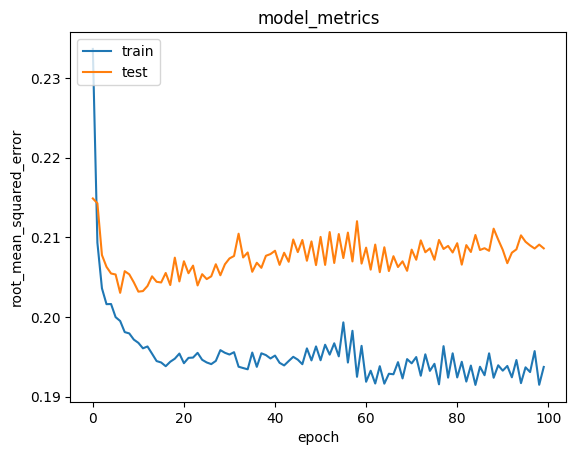

In [ ]:
plt.plot(history.history['root_mean_squared_error'])
plt.plot(history.history['val_root_mean_squared_error'])
plt.title('model_metrics')
plt.ylabel('root_mean_squared_error')
plt.xlabel('epoch')
plt.legend(['train', 'test'], loc='upper left')
plt.show()

#### Rekomendasi Testing

In [ ]:
movie_df = movie_new
df = pd.read_csv('/content/gdrive/MyDrive/Active/ML-TERAPAN/submission2/small-data/ratings.csv')


user_id = df.userId.sample(1).iloc[0]
movie_watched_by_user = df[df.userId == user_id]


movie_not_watched = movie_df[~movie_df['id'].isin(movie_watched_by_user.movieId.values)]['id']
movie_not_watched = list(
    set(movie_not_watched)
    .intersection(set(movie_to_movie_encoded.keys()))
)

movie_not_watched = [[movie_to_movie_encoded.get(x)] for x in movie_not_watched]
user_encoder = user_to_user_encoded.get(user_id)
user_movie_array = np.hstack(
    ([[user_encoder]] * len(movie_not_watched), movie_not_watched)
)

Untuk memperoleh rekomendasi movies, gunakan fungsi model.predict() dari library Keras dengan menerapkan kode berikut.

In [ ]:
ratings = model.predict(user_movie_array).flatten()

top_ratings_indices = ratings.argsort()[-10:][::-1]
recommended_movie_ids = [
    movie_encoded_to_movie.get(movie_not_watched[x][0]) for x in top_ratings_indices
]

print('Showing recommendations for users: {}'.format(user_id))
print('===' * 9)
print('movie with high ratings from user')
print('----' * 8)

top_movie_user = (
    movie_watched_by_user.sort_values(
        by = 'rating',
        ascending=False
    )
    .head(5)
    .movieId.values
)

movie_df_rows = movie_df[movie_df['id'].isin(top_movie_user)]
for row in movie_df_rows.itertuples():
    print(row.movie_name, ':', row.genre)

print('----' * 8)
print('Top 10 movie recommendation')
print('----' * 8)

recommended_movie = movie_df[movie_df['id'].isin(recommended_movie_ids)]
for row in recommended_movie.itertuples():
    print(row.movie_name, ':', row.genre)

43/43 ━━━━━━━━━━━━━━━━━━━━ 0s 3ms/step
Showing recommendations for users: 339
movie with high ratings from user
--------------------------------
Amelie (Fabuleux destin d'Amélie Poulain, Le) (2001) : Comedy|Romance
Beautiful Mind, A (2001) : Drama|Romance
--------------------------------
Top 10 movie recommendation
--------------------------------
Two Family House (2000) : Drama
Hope and Glory (1987) : Drama
More (1998) : Animation|Drama|Sci-Fi|IMAX
Awful Truth, The (1937) : Comedy|Romance
Midnight Clear, A (1992) : Drama|War
Woman Under the Influence, A (1974) : Drama
Adam's Rib (1949) : Comedy|Romance
Safety Last! (1923) : Action|Comedy|Romance
Match Factory Girl, The (Tulitikkutehtaan tyttö) (1990) : Comedy|Drama
Reefer Madness: The Movie Musical (2005) : Comedy|Drama|Musical


Dari hasil di atas movie yang bergenre Comedy Romance menjadi movie yang paling tinggi ratingsnya. Kemudian top 10 movie yang direkomendasikan sistem adalah movie dengan genre Drama, Romance, dan Comedy.